# GPGN268 - Geophysical Data Analysis
## Data Story 01 - Well Logging

**Student:** Lucas Holt


**Date:** 5 May 2024

### Introduction
Expedition 372 of the International Ocean Discover Program (IODP) provide data about gas hydrate-bearing landslides and slow slip events on subduction faults. The data from Expedition 372 were collected with well-logging investigations. Well-logging is a geophysical technique that involves measuring rock and fluid properties from within drilled boreholes. The expedition used logging while drilling (LWD, measuring properties inside a borehole) techniques and measured various physical properties within the boreholes, such as gamma ray resistivity, electrical resistivity, density, and porosity.

These kinds of data contribute to our understanding of geological hazards. The tectonic activity and landslides Expedition 372 investigates can cause major geologic risks and be a source of earthquakes or tsunamis. Well-logging data such as those collected on Expedition 372 are often one-dimensional along the depth of the borehole. However, they can also be collected in a higher-dimensional way to build a more comprehensive model of subsurface physical properties (as is the case with resistivity in this study). Time-series analysis may be applicable for certain dynamic measurements, such as temperature and pressure variations.

In order to analyze these datasets effectively, we will use various tools and packages. This includes NumPy for statistical analysis, pandas for modeling, and matplotlib.pyplot for data visualization.

### Data Cleanup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Place necessary variables into DataFrames

path_cali = '../data/iodp-logging-data/EXP372/U1517A/372-U1517A_cali-nscope.csv'
df_ucav = pd.read_csv(path_cali, skiprows=[0, 1, 2, 3, 5])
df_ucav.set_index('DEPTH_LSF', inplace=True)

path_gr_rab = '../data/iodp-logging-data/EXP372/U1517A/372-U1517A_gr-gvr.csv'
df_gr_rab = pd.read_csv(path_gr_rab, skiprows=[0, 1, 2, 3, 5])
df_gr_rab.set_index('DEPTH_LSF', inplace=True)

path_grma = '../data/iodp-logging-data/EXP372/U1517A/372-U1517A_gr-nscope.csv'
df_grma = pd.read_csv(path_grma, skiprows=[0, 1, 2, 3, 5])
df_grma.set_index('DEPTH_LSF', inplace=True)

path_den = '../data/iodp-logging-data/EXP372/U1517A/372-U1517A_den-nscope.csv'
df_den = pd.read_csv(path_den, skiprows=[0, 1, 2, 3, 5])
df_den.set_index('DEPTH_LSF', inplace=True)

path_por = '../data/iodp-logging-data/EXP372/U1517A/372-U1517A_por-nscope.csv'
df_por = pd.read_csv(path_por, skiprows=[0, 1, 2, 3, 5])
df_por.set_index('DEPTH_LSF', inplace=True)

path_res_atten = '../data/iodp-logging-data/EXP372/U1517A/372-U1517A_res-atten-nscope.csv'
df_res_A40B = pd.read_csv(path_res_atten, skiprows=[0, 1, 2, 3, 5])[['DEPTH_LSF', 'A40B']]
df_res_A40B.set_index('DEPTH_LSF', inplace=True)

path_res_gvr = '../data/iodp-logging-data/EXP372/U1517A/372-U1517A_res-gvr.csv'
df_res_BD = pd.read_csv(path_res_gvr, skiprows=[0, 1, 2, 3, 5])[['DEPTH_LSF', 'RES_BD']]
df_res_BD.set_index('DEPTH_LSF', inplace=True)

path_res_phase = '../data/iodp-logging-data/EXP372/U1517A/372-U1517A_res-phase-nscope.csv'
df_res_P16B = pd.read_csv(path_res_phase, skiprows=[0, 1, 2, 3, 5])[['DEPTH_LSF', 'P16B']]
df_res_P16B.set_index('DEPTH_LSF', inplace=True)

path_vel = '../data/iodp-logging-data/EXP372/U1517A/372-U1517A_vel-sscope.csv'
df_vel = pd.read_csv(path_vel, skiprows=[0, 1, 2, 3, 5])[['DEPTH_LSF', 'VCO', 'VSH']]
df_vel.set_index('DEPTH_LSF', inplace=True)

In [3]:
# Combine into one DataFrame

df_columns = [df_gr_rab, df_grma, df_den, df_por, df_res_BD, df_res_A40B, df_res_P16B, df_vel]

df = df_ucav
for frame in df_columns:
    df = df.merge(frame, on='DEPTH_LSF', how='outer')

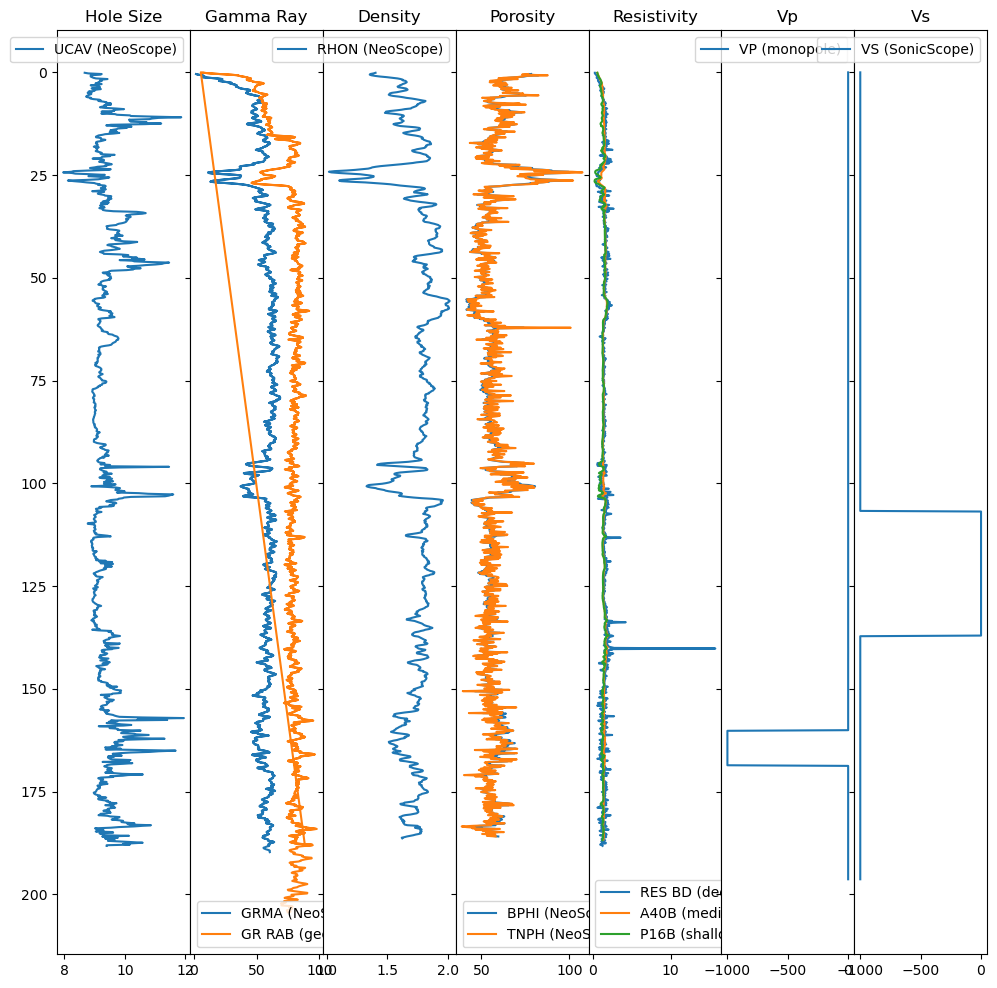

In [4]:
# Initial visualization

vars = [['UCAV'], ['GRMA', 'GR_RAB'], ['RHON'], ['BPHI', 'TNPH'], ['RES_BD', 'A40B', 'P16B'], ['VCO'], ['VSH']]
titles = ['Hole Size', 'Gamma Ray', 'Density', 'Porosity', 'Resistivity', 'Vp', 'Vs']
labels = [['UCAV (NeoScope)'], ['GRMA (NeoScope)', 'GR RAB (geoVISION)'], ['RHON (NeoScope)'], ['BPHI (NeoScope)', 'TNPH (NeoScope)'], ['RES BD (deep)', 'A40B (medium)', 'P16B (shallow)'], ['VP (monopole)'], ['VS (SonicScope)']]

fig, ax = plt.subplots(1, 7, figsize=(12, 12), sharey=True)
for i in range(7):
    for v in range(len(vars[i])):
        ax[i].plot(df[vars[i][v]], df.index, label=labels[i][v])
    ax[i].invert_yaxis()
    ax[i].set_title(titles[i])
    ax[i].legend()
plt.subplots_adjust(wspace=0)

In [5]:
# Replace bad data in VCO and VSH columns with NaN

df['VCO'][(df['VCO'] < 0)] = np.nan
df['VSH'][(df['VSH'] < 0)] = np.nan

In [23]:
# Save cleaned DataFrame

df.to_csv('../data/iodp-logging-data/EXP372/U1517A/DataFrame/cleaned_data.csv')

In [20]:
# Change hole size to show width

ucav_lower = 6.5 - df_ucav / 2
ucav_upper = 6.5 + df_ucav / 2

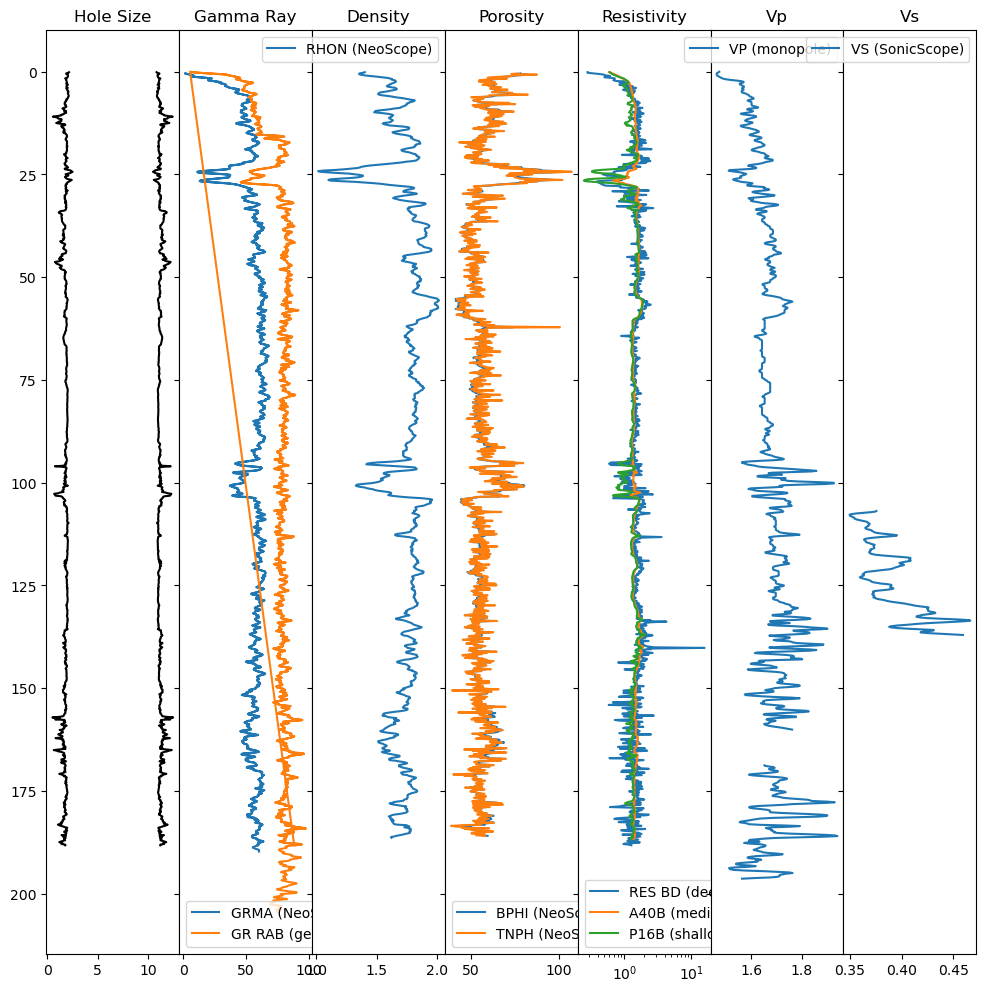

In [21]:
# Plot with cleaned data, updated hole size, and log scale on resistivity

fig, ax = plt.subplots(1, 7, figsize=(12, 12), sharey=True)
ax[0].plot(ucav_lower['UCAV'], ucav_lower.index, 'k')
ax[0].plot(ucav_upper['UCAV'], ucav_upper.index, 'k')
ax[0].invert_yaxis()
ax[0].set_title('Hole Size')

for i in range(1,7):
    for v in range(len(vars[i])):
        ax[i].plot(df[vars[i][v]], df.index, label=labels[i][v])
    ax[i].invert_yaxis()
    ax[i].set_title(titles[i])
    ax[4].set_xscale('log')
    ax[i].legend()
plt.subplots_adjust(wspace=0)

### Analysis

One noticeable thing about the cleaned data is that there is a positive correlation between density and resistivity. The lowest density points might be water, which has low resistivity if it contains dissolved ions. Conversely, porosity and resistivity are inversely related because more pore space means more paths for water (carrying dissolved ions) to take. Porosity is also inversely related to density because they are opposites: porosity describes the amount of empty space and density describes the amount of matter in the space.

There is also a significant amount of space where no s-wave velocities are recorded. One potential cause of this is the borehole being on the ocean floor, causing it to fill with water. S-waves might not be able to make it through the water that surrounds the drill bit, but P-waves can, for the most part.